<a href="https://colab.research.google.com/github/Ayisha2001/Customer-Churn-Prediction-Using-K-Nearest-Neighbors-KNN-/blob/main/knn_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/preprocessed_telecom_churn.csv")

In [ ]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Dependents_Yes,Partner_Yes,SeniorCitizen_1,gender_Male,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,...,MultipleLines_No phone service,MultipleLines_Yes,Churn_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,2,53.85,108.15,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   Dependents_Yes                         7043 non-null   int64  
 4   Partner_Yes                            7043 non-null   int64  
 5   SeniorCitizen_1                        7043 non-null   int64  
 6   gender_Male                            7043 non-null   int64  
 7   StreamingMovies_No internet service    7043 non-null   int64  
 8   StreamingMovies_Yes                    7043 non-null   int64  
 9   StreamingTV_No internet service        7043 non-null   int64  
 10  StreamingTV_Yes                        7043 non-null   int64  
 11  Tech

,tenure,MonthlyCharges,TotalCharges,Dependents_Yes,Partner_Yes,SeniorCitizen_1,gender_Male,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,...,MultipleLines_No phone service,MultipleLines_Yes,Churn_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928,0.299588,0.483033,0.162147,0.504756,0.216669,0.387903,0.216669,...,0.096834,0.421837,0.265370,0.903166,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,24.559481,30.090047,2265.270398,0.458110,0.499748,0.368612,0.500013,0.412004,0.487307,0.412004,...,0.295752,0.493888,0.441561,0.295752,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'Churn' is the target variable
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split data into training and testing sets

# Define a range of k values to test
k_values = range(1, 31)

# Perform cross-validation for each k value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the optimal k value with the highest cross-validation accuracy
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal k value: {optimal_k}")

# Train the KNN model with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_optimal.predict(X_test)

Optimal k value: 21


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7927608232789212


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.6708860759493671
Recall: 0.4262734584450402


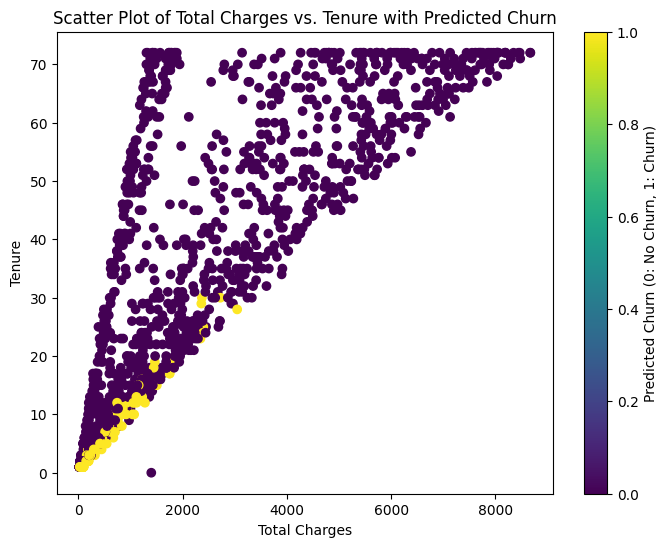

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test['TotalCharges'], X_test['tenure'], c=y_pred, cmap='viridis')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.title('Scatter Plot of Total Charges vs. Tenure with Predicted Churn')
plt.colorbar(label='Predicted Churn (0: No Churn, 1: Churn)')
plt.show()


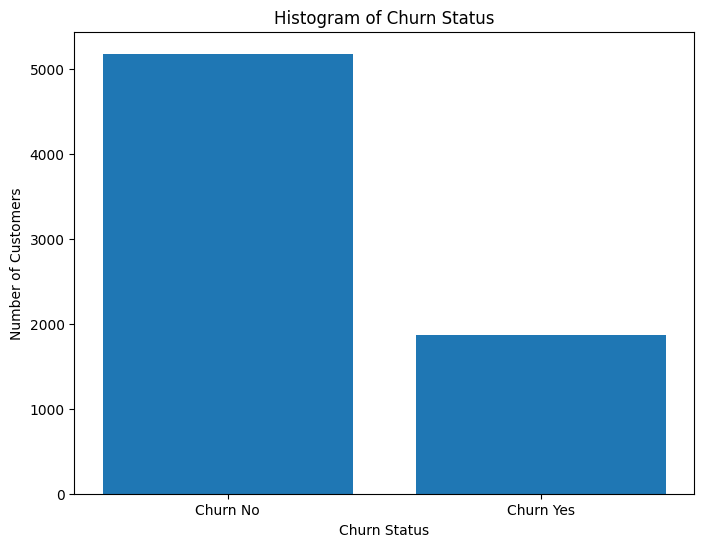

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Churn_Yes' is the column representing churn (1 for yes, 0 for no)
churn_counts = df['Churn_Yes'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(['Churn No', 'Churn Yes'], churn_counts.values)
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Histogram of Churn Status')
plt.show()


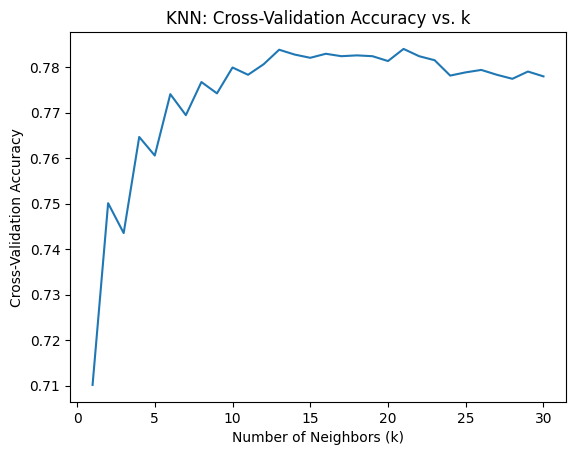

In [ ]:
import matplotlib.pyplot as plt

# Plot the cross-validation scores for different k values
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Cross-Validation Accuracy vs. k')
plt.show()


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Churn_Yes == 0]
df_minority = df[df.Churn_Yes == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.Churn_Yes.value_counts())

# Assuming 'Churn' is the target variable
X_upsampled = df_upsampled.drop('Churn_Yes', axis=1)
y_upsampled = df_upsampled['Churn_Yes']
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(
    X_upsampled, y_upsampled, test_size=0.2, random_state=42
)

# Now you can use X_train_upsampled, y_train_upsampled, X_test_upsampled, y_test_upsampled
# to train and evaluate your KNN model with the upsampled data.


Churn_Yes
0    5174
1    5174
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {'n_neighbors': range(1, 31),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the KNN model with the best parameters
knn_best = KNeighborsClassifier(**grid_search.best_params_)
knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
Best cross-validation score: 0.7861191708129696
Accuracy: 0.794180269694819
Precision: 0.6844444444444444
Recall: 0.4128686327077748


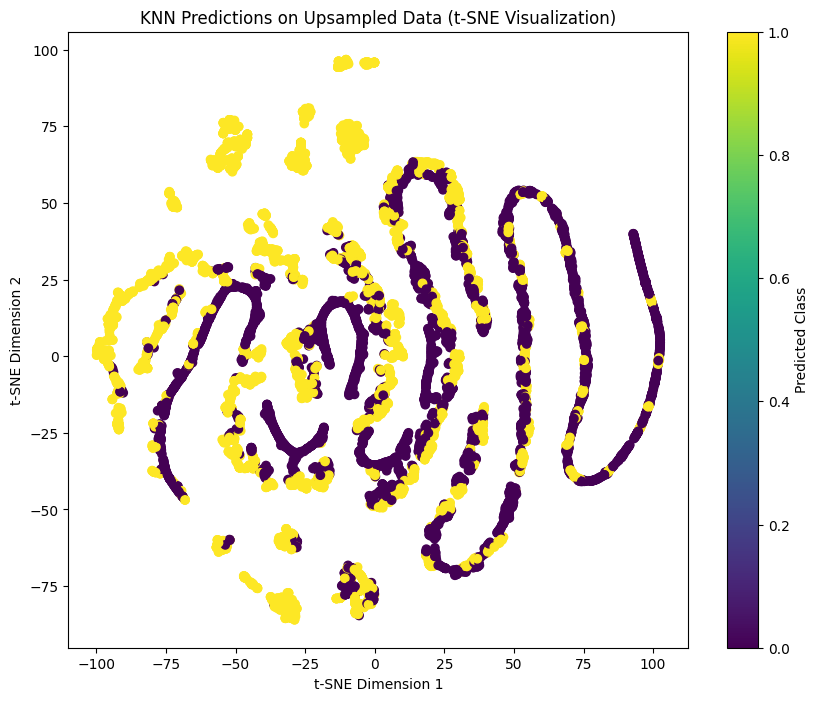

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

# Assuming X_train_upsampled and y_train_upsampled are your upsampled data
# Reduce dimensionality for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_upsampled_tsne = tsne.fit_transform(X_train_upsampled)

# Train a KNN model on the upsampled data (you can use the best parameters from GridSearchCV)
knn_upsampled = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                     weights=grid_search.best_params_['weights'],
                                     metric=grid_search.best_params_['metric'])
knn_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Get the predicted labels for the upsampled training data
y_pred_upsampled = knn_upsampled.predict(X_train_upsampled)

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_train_upsampled_tsne[:, 0], X_train_upsampled_tsne[:, 1], c=y_pred_upsampled, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('KNN Predictions on Upsampled Data (t-SNE Visualization)')
plt.colorbar(label='Predicted Class')
plt.show()
